# Aircraft Risk Analysis Project - Phase 1

## Introduction


In today's fast-evolving business landscape, diversification is key to staying competitive. This project explores a scenario where a company is looking to expand into the aviation industry—an exciting but high-risk move. While the aviation sector holds strong potential for both commercial and private enterprise, safety remains a top concern, especially for new entrants with limited industry experience.

The goal of this project is to use data science techniques to help the company make informed, data-driven decisions as it considers which aircraft to invest in. By examining historical accident data, we can uncover patterns, evaluate safety records, and highlight aircraft models that pose the least operational risk.

This project serves as both a business case and a demonstration of key data science skills: data cleaning, missing value imputation, exploratory data analysis, and visualization. The final output will include actionable insights and an interactive dashboard designed to support decision-making by the company’s new aviation division.

## Objectives

- Understand trends in aircraft accidents over time  
- Identify aircraft with the lowest risk profiles  
- Handle missing data and perform necessary cleaning  
- Present insights using clear visualizations  
- Build an interactive dashboard for stakeholders

## Data Source

The dataset comes from the National Transportation Safety Board (NTSB) and includes records of civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023.

## Tools & Libraries

- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Jupyter Notebook
- Data cleaning and wrangling
- Exploratory data analysis (EDA)

### Step 1 : Import Libraries

In [69]:
#Importing libraries using standard alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

### Step 2 : Load and Inspect Data

In [2]:
#Loading the csv file into the notebook
#Adding low_memory=False to allow pandas to read the full file before deciding datatypes
#Telling pandas to treat ? , Unknown , N/A and blank spaces as missing values
data= pd.read_csv('data/Aviation_Data.csv', low_memory=False, na_values=['?', 'Unknown', 'N/A', ''])

#Inspect the first 5 rows of the dataset
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,NaN,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Checking the number of rows and columns in the dataset
data.shape

# Displaying the dataset's dimensions (rows, columns)
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 90348 rows and 31 columns.


In [4]:
# Getting a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88836 non-null  object 
 5   Country                 88660 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52783 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85576 non-null  object 
 12  Aircraft.Category       32273 non-null  object 
 13  Registration.Number     87569 non-null  object 
 14  Make                    88805 non-null

In [5]:
#Looking at all columns present
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#Getting a summary statistics for numerical columns in the dataset
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Step 3 : Data Cleaning

In [7]:
# Creating a copy of the cleaned DataFrame to avoid modifying the original
cleaned_data = data.copy()

In [8]:
#Inspecting cleaned data
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88836 non-null  object 
 5   Country                 88660 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52783 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85576 non-null  object 
 12  Aircraft.Category       32273 non-null  object 
 13  Registration.Number     87569 non-null  object 
 14  Make                    88805 non-null

In [9]:
#Changing the Event.Date and Publication.Date columns into datetime
cleaned_data['Event.Date']=pd.to_datetime(cleaned_data['Event.Date'])
cleaned_data['Publication.Date']=pd.to_datetime(cleaned_data['Publication.Date'])

#Checking if it has been applied
cleaned_data[['Event.Date','Publication.Date']].head()

,Event.Date,Publication.Date
0,1948-10-24,NaT
1,1962-07-19,1996-09-19
2,1974-08-30,2007-02-26
3,1977-06-19,2000-12-09
4,1979-08-02,1980-04-16


In [10]:
# Checking if there are any duplicate rows
cleaned_data.duplicated().any()

True

In [11]:
# Droping duplicated rows and keeping the first occurrence
cleaned_data = cleaned_data.drop_duplicates()

#Checking dimensions of our cleaned data after duplicates have been dropped
cleaned_data.shape
print(f"The Cleaned dataset contains {cleaned_data.shape[0]} rows and {cleaned_data.shape[1]} columns.")

The Cleaned dataset contains 88958 rows and 31 columns.


In [12]:
#Grouping the numerical values and fill them with the mean
numeric_values = cleaned_data.select_dtypes(include=[float, int]).columns
cleaned_data[numeric_values] = cleaned_data[numeric_values].fillna(cleaned_data[numeric_values].mean())

In [13]:
#Checking for any null values in the numerical values
cleaned_data[numeric_values].isna().sum()

Number.of.Engines         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [ ]:
# Selecting all object and datetime columns
categorical_values = cleaned_data.select_dtypes(include=['object', 'datetime64[ns]']).columns

# Looping through each column and filling missing values with the mode
for column in categorical_values:
    mode_series = cleaned_data[column].mode()

    # Only fills if the mode exists
    if not mode_series.empty:
        mode_value = mode_series.iloc[0]
        cleaned_data[column] = cleaned_data[column].fillna(mode_value)


In [17]:
#Check for any null values in the categoriacal values
cleaned_data[categorical_values].isna().sum()

Event.Id                 0
Investigation.Type       0
Accident.Number          0
Event.Date               0
Location                 0
Country                  0
Latitude                 0
Longitude                0
Airport.Code             0
Airport.Name             0
Injury.Severity          0
Aircraft.damage          0
Aircraft.Category        0
Registration.Number      0
Make                     0
Model                    0
Amateur.Built            0
Engine.Type              0
FAR.Description          0
Schedule                 0
Purpose.of.flight        0
Air.carrier              0
Weather.Condition        0
Broad.phase.of.flight    0
Report.Status            0
Publication.Date         0
dtype: int64

In [36]:
# Looping through each categorical column and applying strip() for each column
for column in categorical_values:
    # Converting the column to string type first, then applying strip() and making them lowercase
    cleaned_data[column] = cleaned_data[column].astype(str).str.strip().str.capitalize()

In [37]:
# Selecting numeric and categorical data by column names, then combining them back into one DataFrame
numerical_data = cleaned_data[numeric_values]
categorical_data = cleaned_data[categorical_values]
cleaned_data = pd.concat([numerical_data, categorical_data], axis=1)

#Checking the 1st 5 rows of the cleaned data
cleaned_data.head()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,1.000000,2.0,0.000000,0.000000,0.00000,20001218x45444,Accident,Sea87la080,1948-10-24,"Moose creek, id",...,No,Reciprocating,091,Nsch,Personal,Pilot,Unk,Cruise,Probable cause,2020-09-25
1,1.000000,4.0,0.000000,0.000000,0.00000,20001218x45447,Accident,Lax94la336,1962-07-19,"Bridgeport, ca",...,No,Reciprocating,091,Nsch,Personal,Pilot,Unk,Landing,Probable cause,1996-09-19
2,1.000000,3.0,0.279881,0.357061,5.32544,20061025x01555,Accident,Nyc07la005,1974-08-30,"Saltville, va",...,No,Reciprocating,091,Nsch,Personal,Pilot,Imc,Cruise,Probable cause,2007-02-26
3,1.000000,2.0,0.000000,0.000000,0.00000,20001218x45448,Accident,Lax96la321,1977-06-19,"Eureka, ca",...,No,Reciprocating,091,Nsch,Personal,Pilot,Imc,Cruise,Probable cause,2000-12-09
4,1.146585,1.0,2.000000,0.357061,0.00000,20041105x01764,Accident,Chi79fa064,1979-08-02,"Canton, oh",...,No,Reciprocating,091,Nsch,Personal,Pilot,Vmc,Approach,Probable cause,1980-04-16


In [38]:
#checking the data in the make column
cleaned_data['Make'].head(10)

0              Stinson
1                Piper
2               Cessna
3             Rockwell
4               Cessna
5    Mcdonnell douglas
6               Cessna
7               Cessna
8               Cessna
9       North american
Name: Make, dtype: object

In [39]:
#Inspecting information about the data after cleaning
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number.of.Engines       88958 non-null  float64
 1   Total.Fatal.Injuries    88958 non-null  float64
 2   Total.Serious.Injuries  88958 non-null  float64
 3   Total.Minor.Injuries    88958 non-null  float64
 4   Total.Uninjured         88958 non-null  float64
 5   Event.Id                88958 non-null  object 
 6   Investigation.Type      88958 non-null  object 
 7   Accident.Number         88958 non-null  object 
 8   Event.Date              88958 non-null  object 
 9   Location                88958 non-null  object 
 10  Country                 88958 non-null  object 
 11  Latitude                88958 non-null  object 
 12  Longitude               88958 non-null  object 
 13  Airport.Code            88958 non-null  object 
 14  Airport.Name            88958 non-null

'''
The dataset has been thoroughly cleaned, with missing values handled. Duplicate rows have been removed, and data inside the columns cleaned. Following these data cleaning steps, the dataset now consists of 31 columns and 88,958 rows. The next step involves visualizing the cleaned data.
'''

### Step 4 : Data Analysis and Visualizations

In [40]:
#summary statistics for numerical columns in the cleaned dataset
cleaned_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88958.000000,88958.000000,88958.000000,88958.000000,88958.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.430791,5.120083,1.430754,2.079349,26.958925
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


'''
Key Analysis:

Fatal Injuries: Majority of the accidents habe no fatalities as seen in the 25%, 50% and 75% percentiles. However, there are extreme cases with upto 349 fatal injuries in one incident

Serious and Minor Injuries: Similar to the fatal injuries, majority of the incidents have no serious and minor injuries, but there are some outliers with other 161 serious injuries and 380 minor injuries

Uninjured individuals: Most accidesnts have some injured individals with a higher median value of 2 while in other cases many people were uninjured
'''

#### Step 4a : Accident Frequency by Aircraft Make

In [41]:
#Checking the columns i have
cleaned_data.columns

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Id',
       'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Engine.Type',
       'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [42]:
#Check if we can use the accident Number column for analysis
cleaned_data['Accident.Number'].head()

0    Sea87la080
1    Lax94la336
2    Nyc07la005
3    Lax96la321
4    Chi79fa064
Name: Accident.Number, dtype: object

Since the accident number column contains strings we can not use it for analysis. We will therefore create a new column called Total Accidents which will count the number of both minor and serious injuries

In [43]:
# Create a new column for Total Accidents (sum of Serious and Minor Injuries)
cleaned_data['Total.Accidents'] = cleaned_data['Total.Serious.Injuries'] + cleaned_data['Total.Minor.Injuries']

# Check if  the new column is added
cleaned_data[['Make', 'Model', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Accidents']].head()

,Make,Model,Total.Serious.Injuries,Total.Minor.Injuries,Total.Accidents
0,Stinson,108-3,0.000000,0.000000,0.000000
1,Piper,Pa24-180,0.000000,0.000000,0.000000
2,Cessna,172m,0.279881,0.357061,0.636942
3,Rockwell,112,0.000000,0.000000,0.000000
4,Cessna,501,2.000000,0.357061,2.357061


'''
This code analyzes aircraft accident data by counting how many accidents are associated with each aircraft manufacturer listed in the 'Make' column. It first groups the dataset by 'Make' and calculates the number of records (accidents) for each group using .size(), then resets the index to create a new DataFrame with a readable column named 'Total.Accidents'. The results are sorted in descending order to highlight the manufacturers with the most accidents, and finally, the top 10 aircraft makes with the highest accident counts are displayed using .head(10). This provides a quick overview of which aircraft types are most frequently involved in reported incidents.
'''

In [103]:
# Count the number of accidents per aircraft make
accidents_per_model = cleaned_data.groupby(['Make']).size().reset_index(name='Total.Accidents')

# Sort by the accident count for better readability
accidents_per_model = accidents_per_model.sort_values(by='Total.Accidents', ascending=False)

# Display the top 10 aircraft types with the most accidents
accidents_per_model.head(10)

,Make,Total.Accidents
1259,Cessna,27302
5276,Piper,14870
638,Beech,5372
827,Boeing,2745
658,Bell,2722
4753,Mooney,1334
5761,Robinson,1230
2853,Grumman,1172
688,Bellanca,1045
3352,Hughes,932


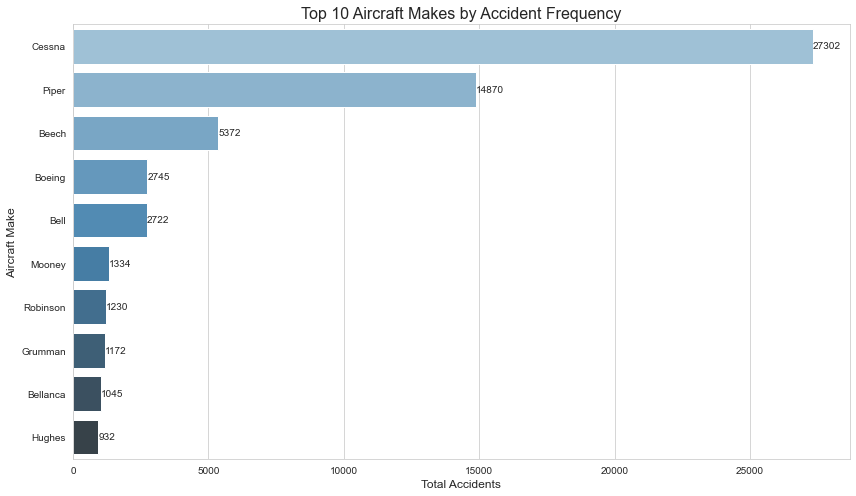

In [104]:
#Setting  a modern style
sns.set_style("whitegrid")

#Setting the figure size
plt.figure(figsize=(12, 7))

#Limitting the bar graph to only show the top 10 makes
top_makes = accidents_per_model.head(10)

#Plotting with Seaborn for built-in aesthetics
sns.barplot(x='Total.Accidents', y='Make', data=top_makes, palette='Blues_d')

#Adding titles and labels with better font size
plt.title('Top 10 Aircraft Makes by Accident Frequency', fontsize=16)
plt.xlabel('Total Accidents', fontsize=12)
plt.ylabel('Aircraft Make', fontsize=12)

#Adding value labels on the bars
for index, value in enumerate(top_makes['Total.Accidents']):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

# Clean layout
plt.tight_layout()
plt.show()


#### Step 4b : Accident Severity by Aircraft make 

In [50]:
#Filter fatal accidents
fatal_accidents = cleaned_data[cleaned_data['Injury.Severity'] == 'Fatal']

In [109]:
fatal_by_make = fatal_accidents.groupby('Make').size().reset_index(name='Fatal_Accident_Count')
fatal_by_make = fatal_by_make.sort_values('Fatal_Accident_Count', ascending=False)
print(fatal_by_make.head(10))

                    Make  Fatal_Accident_Count
238               Cessna                  1120
806                Piper                   745
135                Beech                   384
143                 Bell                   193
882             Robinson                   181
716               Mooney                    92
259   Cirrus design corp                    69
35           Air tractor                    48
164               Boeing                    46
1057                Vans                    45


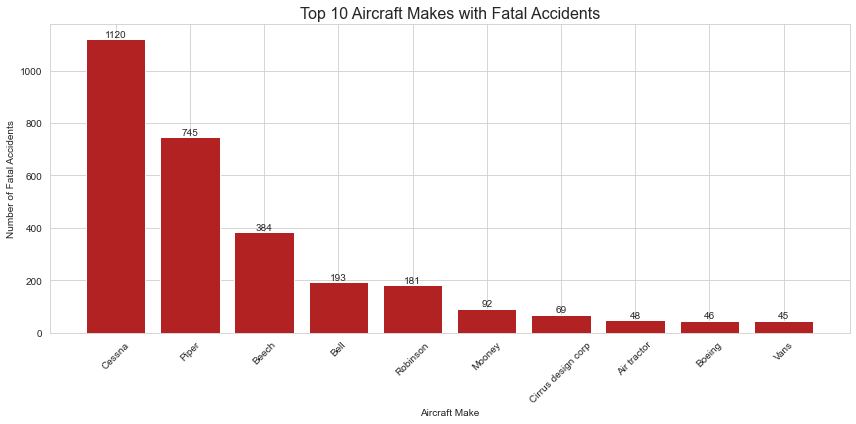

In [53]:

#Use seaborn style
sns.set_style("whitegrid")

# Sort descending
top_10_fatal = fatal_by_make.sort_values('Fatal_Accident_Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_fatal['Make'], top_10_fatal['Fatal_Accident_Count'], color='firebrick')

# Add labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Aircraft Makes with Fatal Accidents', fontsize=16)
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 4c :Yearly Accident Trend by Aircraft make 

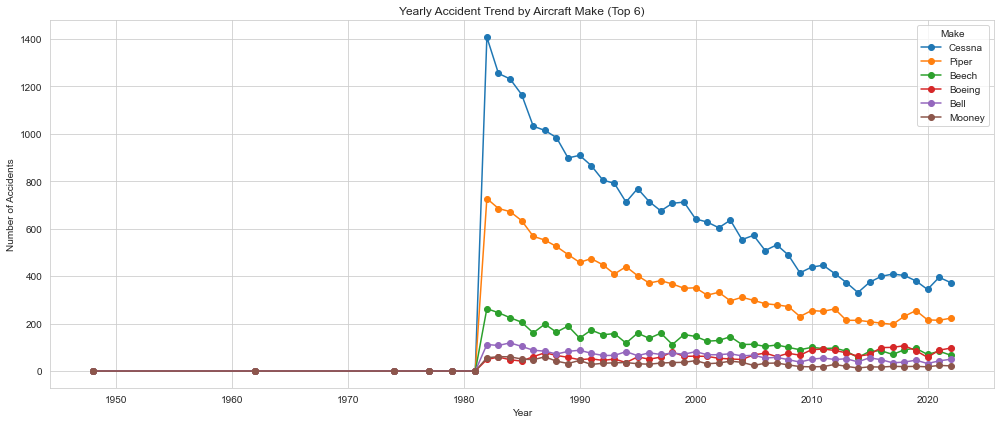

In [60]:
# Ensure 'Event.Date' is datetime type
cleaned_data['Event.Date'] = pd.to_datetime(cleaned_data['Event.Date'], errors='coerce')

# Extract Year and Month Name
cleaned_data['Year'] = cleaned_data['Event.Date'].dt.year
cleaned_data['Month'] = cleaned_data['Event.Date'].dt.month_name()

# Group by Year and Make
accidents_by_year_make = cleaned_data.groupby(['Year', 'Make']).size().reset_index(name='Accident_Count')

# Pivot the data to make plotting easier
pivot_make_year = accidents_by_year_make.pivot(index='Year', columns='Make', values='Accident_Count').fillna(0)

# Plot trends for top 6 makes by total accidents
top_6_makes = cleaned_data['Make'].value_counts().head(6).index
pivot_make_year[top_6_makes].plot(figsize=(14, 6), marker='o')
plt.title('Yearly Accident Trend by Aircraft Make (Top 6)')
plt.ylabel('Number of Accidents')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Make')
plt.tight_layout()
plt.show()


#### Step 4d : Monthly Accident Trend by Aircraft make 

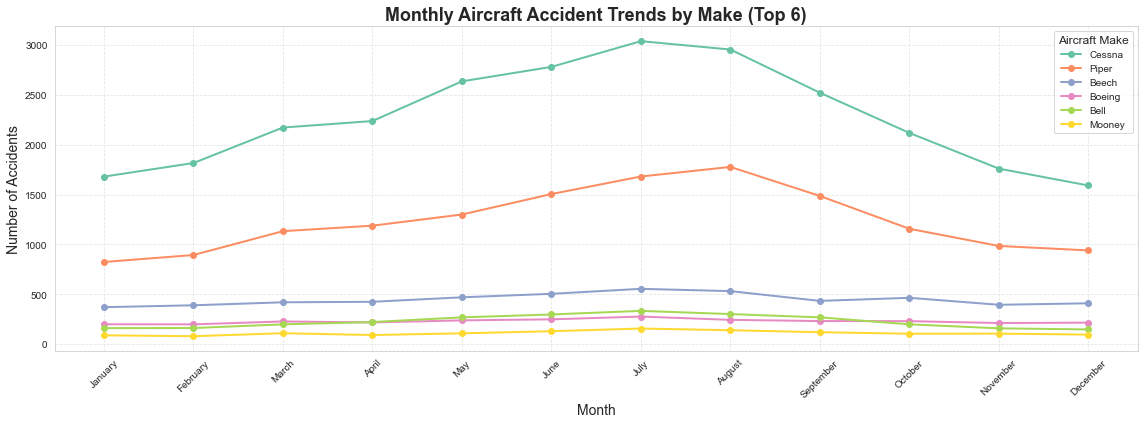

In [70]:

# Group by Month and Make
accidents_by_month_make = cleaned_data.groupby(['Month', 'Make']).size().reset_index(name='Accident_Count')

# Convert month names to categorical with correct order
month_order = list(calendar.month_name)[1:]  # ['January', 'February', ..., 'December']
accidents_by_month_make['Month'] = pd.Categorical(accidents_by_month_make['Month'], categories=month_order, ordered=True)

# Pivot the data
pivot_make_month = accidents_by_month_make.pivot(index='Month', columns='Make', values='Accident_Count').fillna(0)

# Get top 6 aircraft makes by total accident count
top_6_makes = cleaned_data['Make'].value_counts().head(6).index

# Set a nice style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))

# Plot with custom color palette
palette = sns.color_palette("Set2", len(top_6_makes))
pivot_make_month[top_6_makes].plot(marker='o', linewidth=2, color=palette, ax=plt.gca())

# Title and labels
plt.title('Monthly Aircraft Accident Trends by Make (Top 6)', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Show all 12 bins clearly
plt.xticks(ticks=range(12), labels=month_order, rotation=45)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Aircraft Make', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

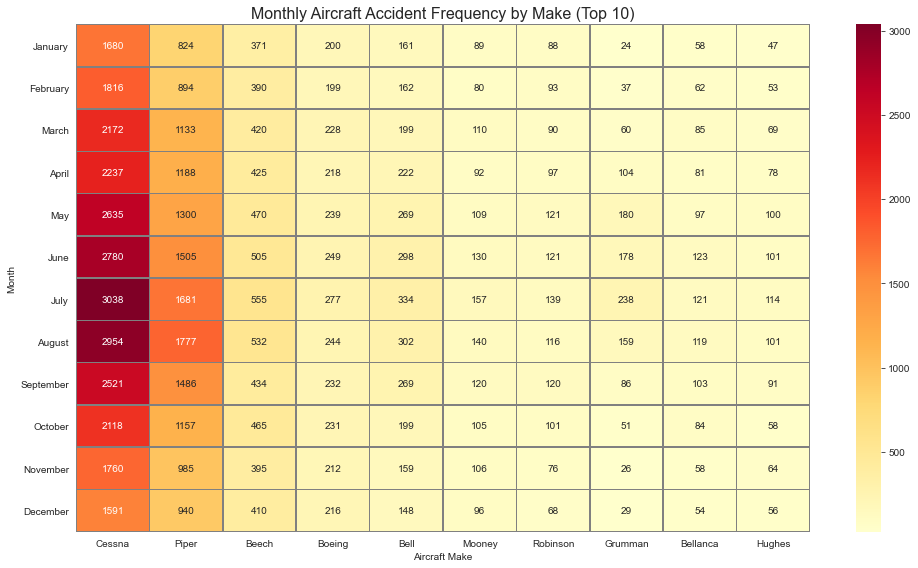

In [72]:
# Ensure 'Month' is in correct order
month_order = list(calendar.month_name)[1:]  # ['January', ..., 'December']
cleaned_data['Month'] = pd.Categorical(cleaned_data['Month'], categories=month_order, ordered=True)

# Group by Month and Make
accidents_by_month_make = cleaned_data.groupby(['Month', 'Make']).size().reset_index(name='Accident_Count')

# Pivot for heatmap
heatmap_data = accidents_by_month_make.pivot(index='Month', columns='Make', values='Accident_Count').fillna(0)

# Optionally, filter to top 10 makes
top_makes = cleaned_data['Make'].value_counts().head(10).index
heatmap_data = heatmap_data[top_makes]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5, linecolor='gray')
plt.title('Monthly Aircraft Accident Frequency by Make (Top 10)', fontsize=16)
plt.xlabel('Aircraft Make')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

#### Step 4e : Countries by Aircraft Accidents

In [73]:
# Count accidents per country
accidents_by_country = cleaned_data['Country'].value_counts().reset_index()
accidents_by_country.columns = ['Country', 'Accident_Count']


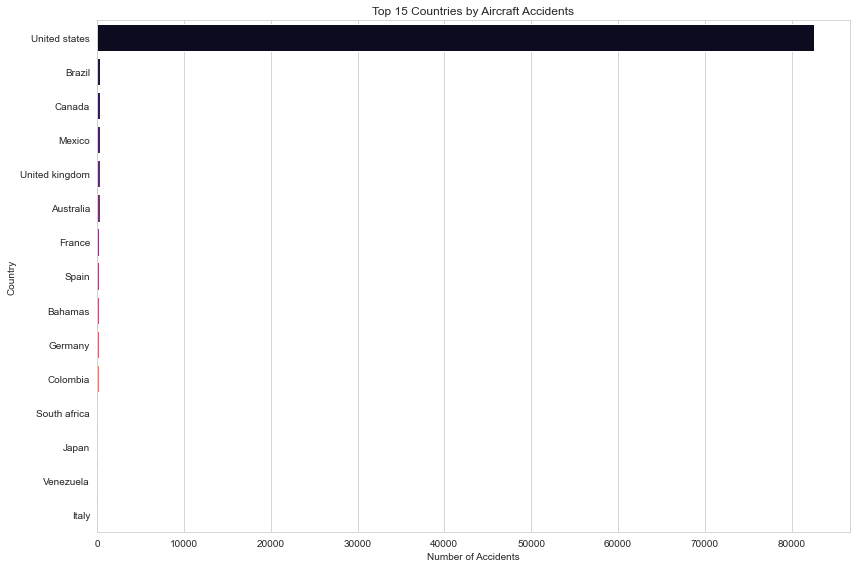

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(data=accidents_by_country.head(15), y='Country', x='Accident_Count', palette='magma')
plt.title('Top 15 Countries by Aircraft Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Step 4f : Aircraft Make by Level of Damage

In [84]:
cleaned_data['Aircraft.damage']

0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
90343    Substantial
90344    Substantial
90345    Substantial
90346    Substantial
90347    Substantial
Name: Aircraft.damage, Length: 88958, dtype: object

In [ ]:
damage_by_make = (
    cleaned_data[cleaned_data['Aircraft.damage'].isin(['Destroyed', 'Substantial'])]
    .groupby(['Make' 'Aircraft.damage'])
    .size()
    .reset_index(name='Damage_Count')
)

In [ ]:
pivot_damage = damage_by_make.pivot_table(
    index='Make',
    columns='Aircraft.damage',
    values='Damage_Count',
    fill_value=0
).reset_index()


In [87]:
top_damage_comparison = pivot_damage[(pivot_damage['Destroyed'] > 0) | (pivot_damage['Substantial'] > 0)].sort_values(
    by=['Destroyed', 'Substantial'], ascending=False
).head(15)


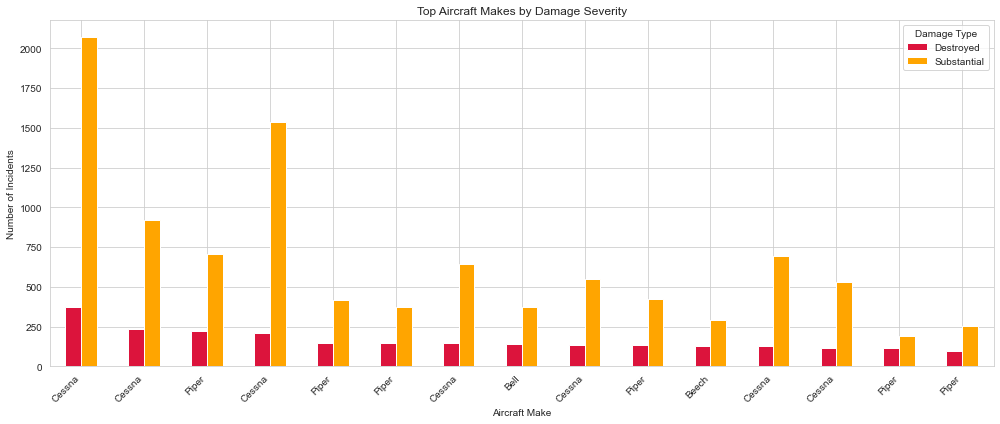

In [110]:
top_damage_comparison.set_index(['Make'])[['Destroyed', 'Substantial']].plot(
    kind='bar', figsize=(14, 6), color=['crimson', 'orange']
)
plt.title('Top Aircraft Makes by Damage Severity')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Damage Type')
plt.tight_layout()
plt.show()


#### Step 4g : Purpose of Flight and Safety Analysis

In [111]:
# View unique purposes
cleaned_data['Purpose.of.flight'].value_counts()


Personal                     62511
Instructional                10601
Aerial application            4712
Business                      4018
Positioning                   1646
Other work use                1264
Ferry                          812
Aerial observation             794
Public aircraft                720
Executive/corporate            553
Flight test                    405
Skydiving                      182
External load                  123
Public aircraft - federal      105
Banner tow                     101
Air race show                   99
Public aircraft - local         74
Public aircraft - state         64
Air race/show                   59
Glider tow                      53
Firefighting                    40
Air drop                        11
Asho                             6
Pubs                             4
Publ                             1
Name: Purpose.of.flight, dtype: int64

In [115]:
usage_by_model_purpose = cleaned_data.groupby(['Make','Model', 'Purpose.of.flight']).size().reset_index(name='Flight_Count')
usage_by_model_purpose = usage_by_model_purpose.sort_values(by='Flight_Count', ascending=False)[:10]  # Top 10
usage_by_model_purpose.head(10)  # Display top 10 rows


,Make,Model,Purpose.of.flight,Flight_Count
6274,Cessna,152,Instructional,1444
6331,Cessna,172,Personal,1203
6276,Cessna,152,Personal,979
6453,Cessna,172n,Personal,734
17766,Piper,Pa-28-140,Personal,703
6444,Cessna,172m,Personal,572
6558,Cessna,180,Personal,549
6183,Cessna,150,Personal,528
6622,Cessna,182,Personal,513
4621,Boeing,737,Personal,485


In [116]:
safety_by_purpose = cleaned_data.groupby(['Make', 'Model', 'Purpose.of.flight']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Aircraft.damage': lambda x: (x == 'Destroyed').sum(),
    'Event.Id': 'count'
}).reset_index().rename(columns={'Event.Id': 'Accident_Count'})

# Calculate injury rate and damage rate
safety_by_purpose['Total_Injuries'] = safety_by_purpose['Total.Fatal.Injuries'] + safety_by_purpose['Total.Serious.Injuries'] + safety_by_purpose['Total.Minor.Injuries']
safety_by_purpose['Injury_Rate'] = safety_by_purpose['Total_Injuries'] / safety_by_purpose['Accident_Count']
safety_by_purpose['Destroyed_Rate'] = safety_by_purpose['Aircraft.damage'] / safety_by_purpose['Accident_Count']


Text(0.5, 0, 'Injury Rate')

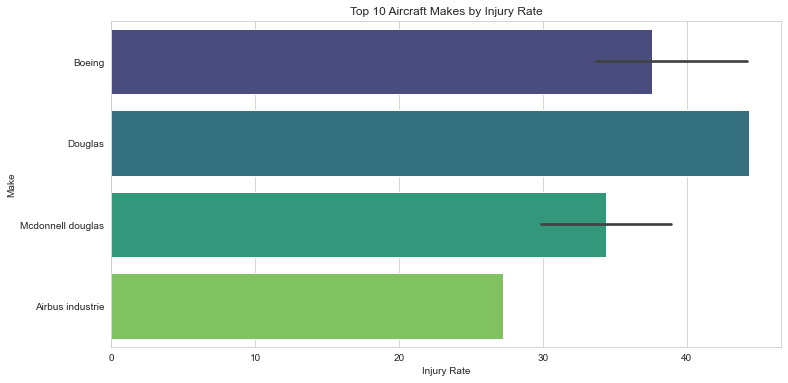

In [117]:
filtered = safety_by_purpose[safety_by_purpose['Accident_Count'] >= 5]
filtered = filtered.sort_values(by='Injury_Rate', ascending=False).head(10)  # Top 10 by injury rate
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x='Injury_Rate', y='Make', palette='viridis')
plt.title('Top 10 Aircraft Makes by Injury Rate')
plt.xlabel('Injury Rate')   